# Homework 1: U.S. Boundary Currents

Name: Megan Sharkey

Date: August 25, 2025

#### Overview
In class, we examined the general structure of ocean circulation on large scales and saw that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [14]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [15]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_evel = xr.open_dataset('EVEL_2015_12.nc')
ds_nvel = xr.open_dataset('NVEL_2015_12.nc')
ds_nvel


<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    NVEL       (time, k, j, i) float64 104MB ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Tue Aug 27 17:34:26 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [16]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_evel['EVEL'])
print(np.shape(evel))
nvel = np.array(ds_nvel['NVEL'])
longitude = np.array(ds_evel['longitude'])
latitude = np.array(ds_evel['latitude'])
print(np.shape(longitude))

(1, 50, 360, 720)
(720,)


Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

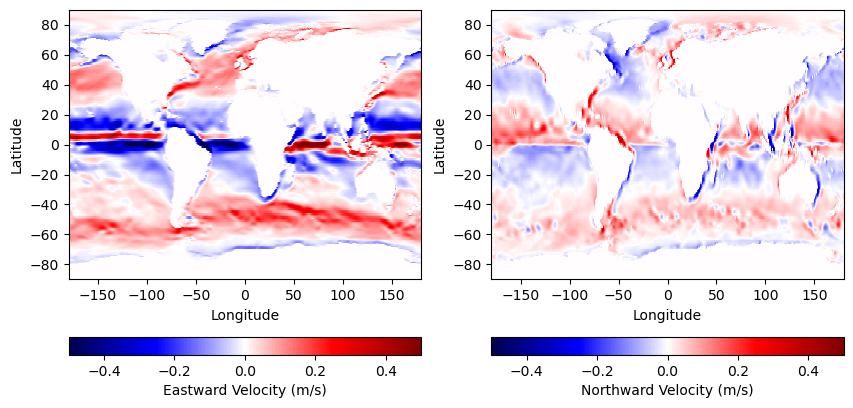

In [17]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
plt.pcolormesh(longitude, latitude, evel[0, 0, :, :], vmin=-0.5, vmax=0.5, cmap='seismic')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Eastward Velocity (m/s)', orientation='horizontal')


# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
plt.pcolormesh(longitude, latitude, nvel[0, 0, :, :], vmin=-0.5, vmax=0.5, cmap='seismic')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Northward Velocity (m/s)', orientation='horizontal')

plt.show()



### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

Questions:

What direction are the surface currents moving (roughly) at:
30N on the east cost of the U.S.? the west coast?
45N on the east cost of the U.S.? the west coast?
Which current flows faster? East coast or west coast?
Explain how these currents are part of the gyres in the North Atlantic and North Pacific.


1. a) At 30°N on the east coast of the U.S. the surface currents are moving Northeast. At 30°N on the west coast of the U.S. the surface currents are roughly moving Southeast.
   b) At 45°N on the east coast of the U.S. the surface currents are moving slightly Southwest. At 45°N on the west coast the currents are moving primarily Northward.
2. The east coast of the U.S. had faster currents, indicated by the intensity of the velocity colorbands. The Gulf Stream moves along the east coast, supported by the plots above. 
3. The gyres in the North Pacific rotate in a clockwise direction, moving Southeast along the west coast of the U.S. In the map above, it appears that the currents are moving Northward at 45°N on the west coast, which doesn't align with the gyres in that region. On the east coast, the currents plotted above also move in a clockwise direction. This is in alignment with the movement of currents in the North Atlantic gyre. 

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [18]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook

import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr
import cmocean

ds_theta = xr.open_dataset('THETA_2015_12.nc')
ds_theta


<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, j, i) float64 104MB ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Thu Aug 22 19:28:22 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [19]:
# store the THETA grid into a into numpy array

theta = np.array(ds_theta['THETA'])

# in addition, make variables for longitude and latitude
longitude = np.array(ds_theta['longitude'])
latitude = np.array(ds_theta['latitude'])
print(np.shape(longitude))


(720,)


Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

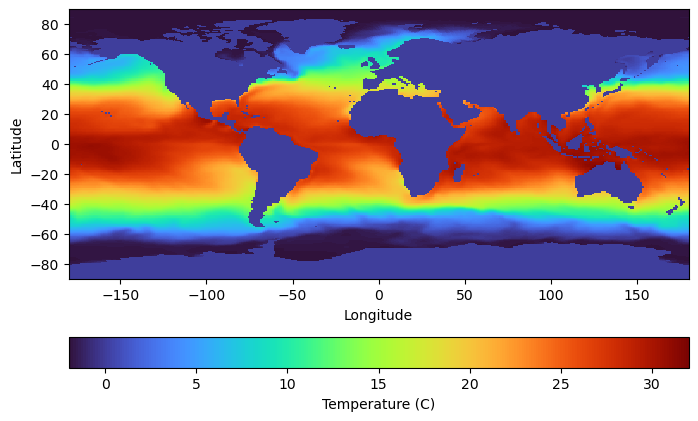

In [20]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data

plt.pcolormesh(longitude, latitude, theta[0, 0, :, :], vmin=-2, vmax=32, cmap='turbo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Temperature (C)', orientation='horizontal')



### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?


# change this cell to a markdown and input your response here

1. The temperature on the west coast of the U.S. is generally colder than the east coast at the same latitude. At around 40°N, the coastal temperatures on the east coast drop, but from 20°N to 40°N, the east coast temperature is significantly warmer than the west coast. 
2. Ocean currents contribute to this temperature pattern due to the gyres in the two oceans. In the North Atlantic, the Gulf Stream carries warm water northward from the Caribbean, producing warmer coastal temperatures until about 40°N, where the current veers eastward. In the North Pacific, currents from the North Pacific gyre transport cold water southward from Alaska along the coast, leading to cooler sea surface temperatures down to roughly 30°N.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [21]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr
import cmocean

ds_wvelstar = xr.open_dataset('WVELSTAR_2015_12.nc')
ds_wvelstar


<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, j: 360, k_l: 50, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * k_l        (k_l) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    timestep   (time) int64 8B ...
    Zl         (k_l) float32 200B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    WVELSTAR   (time, k_l, j, i) float64 104MB ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      0.0
    date_created:                 Tue Aug 27 18:20:19 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [22]:
# store the WVELSTAR grid into a into numpy array

wvelstar = np.array(ds_wvelstar['WVELSTAR'])



Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [23]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?

# k_l is the variable for depth (z)

Zl = np.array(ds_wvelstar['Zl'])
print(np.shape(wvelstar))

print(wvelstar[0, :, 259, :].shape)
print(Zl.shape)                               
print(longitude.shape)                  


(1, 50, 360, 720)
(50, 720)
(50,)
(720,)


Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

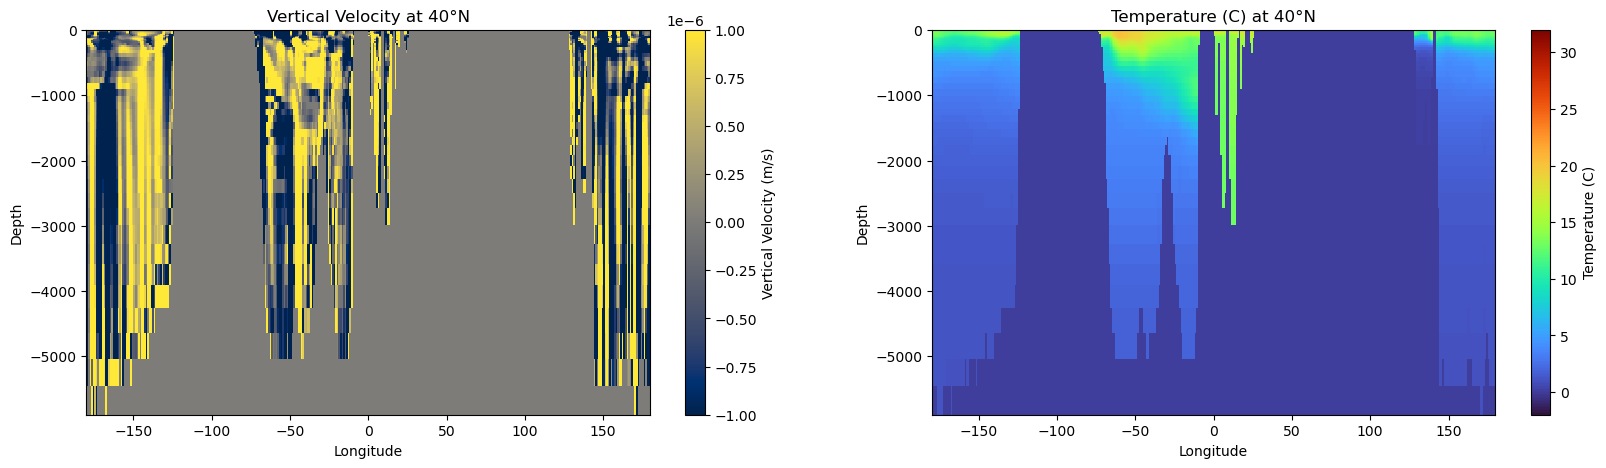

In [24]:
# make a figure
fig = plt.figure(figsize=(20,5))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(1,2,1)

C = plt.pcolormesh(longitude,Zl,wvelstar[0, :, 259, :], vmin = -10**-6, vmax= 10**-6, cmap='cividis')
plt.colorbar(C, label='Vertical Velocity (m/s)' )
plt.title('Vertical Velocity at 40°N')
plt.ylabel('Depth')
plt.xlabel('Longitude');


# make a subplot of the vertical profile of temperature
plt.subplot(1,2,2)

C = plt.pcolormesh(longitude,Zl,theta[0, :, 259, :], vmin = -2, vmax=32, cmap='turbo')
plt.colorbar(C, label='Temperature (C)' )
plt.title('Temperature (C) at 40°N')
plt.ylabel('Depth')
plt.xlabel('Longitude');


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

# change this cell to a markdown and input your response here
1. The vertical velocity in the current on the west coast is greater (and more positive) than that of the east coast of the U.S.
2. Vertical velocity is much slower than horizontal velocity. The difference arises from their forcing mechanisms: horizontal velocity is primarily driven by wind circulation, while vertical velocity is influenced by thermohaline circulation and occurs on a much smaller scale. 
3. Vertical currents along coastlines affect surface temperature through upwelling. Positive vertical velocity indicates upwelling, which brings colder, nutrient-rich water from deeper layers to the surface, lowering coastal surface temperatures (as seen on the West Coast of the U.S.).
4. Due to the Ekman spiral and the Coriolis effect, southward winds along the West Coast cause surface waters to deflect about 90 degrees to the right, or offshore. This offshore transport creates a deficit of surface water near the coast, which is balanced by upwelling — the rising of deeper, colder water to the surface (positive vertical velocity).